<a href="https://colab.research.google.com/github/monindew/hongongmachine/blob/main/iamdo9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
filename = list(files.upload().keys())

Saving advertising.csv to advertising (1).csv


In [6]:
import pandas as pd
advertising = pd.read_csv("advertising.csv")
advertising.sample(3)

,TV,Radio,Newspaper,Sales
133,219.8,33.5,45.1,19.6
78,5.4,29.9,9.4,5.3
192,17.2,4.1,31.6,5.9


In [7]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
advertising.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [10]:
corrMatrix = advertising.corr()
corrMatrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


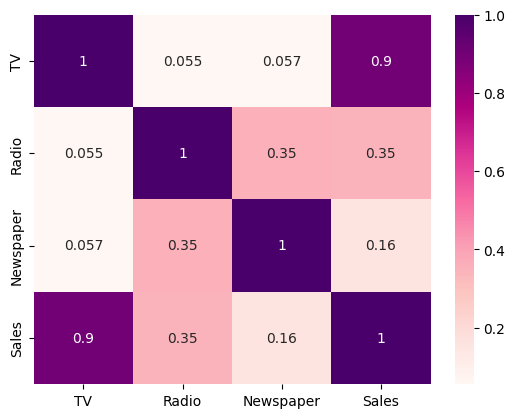

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corrMatrix, annot=True, cmap="RdPu")
plt.show()

In [14]:
corr_sort = corrMatrix[["Sales"]].sort_values(by="Sales",ascending=False)
corr_sort

,Sales
Sales,1.000000
TV,0.901208
Radio,0.349631
Newspaper,0.157960


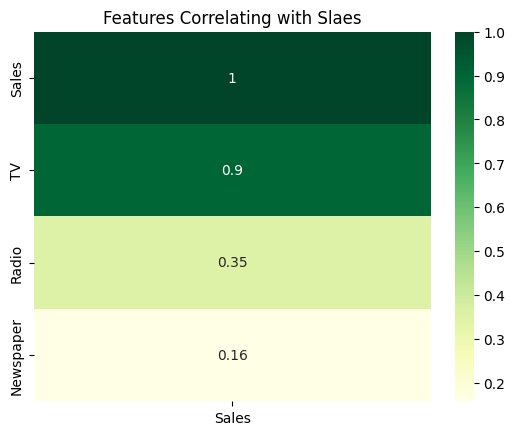

In [16]:
heatmap = sns.heatmap(corr_sort, annot=True, cmap="YlGn")
heatmap.set_title("Features Correlating with Slaes")
plt.show()

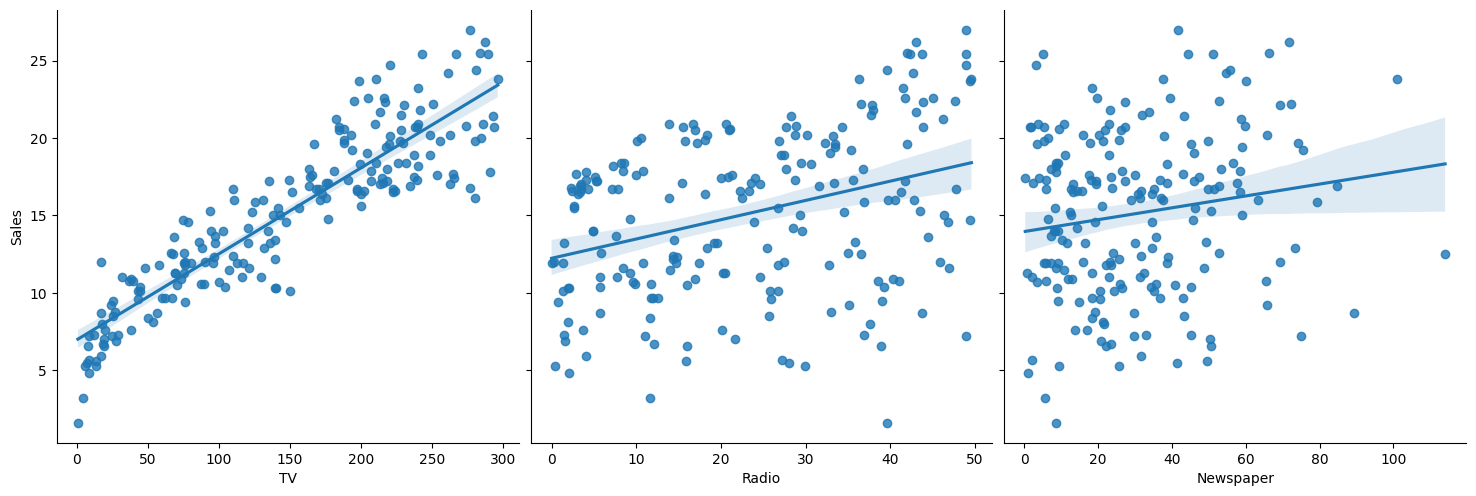

In [18]:
sns.pairplot(data = advertising, x_vars = ["TV", "Radio", "Newspaper"],
             y_vars = ["Sales"], height = 5, kind="reg")

In [19]:
X_data1 = advertising[["TV"]]
y_data1 = advertising[["Sales"]]
display(X_data1)
display(y_data1)

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X_data1)
X_scaled1

array([[ 0.96985227],
       [-1.19737623],
       [-1.51615499],
       [ 0.05204968],
       [ 0.3941822 ],
       [-1.61540845],
       [-1.04557682],
       [-0.31343659],
       [-1.61657614],
       [ 0.61604287],
       [-0.94515567],
       [ 0.79002835],
       [-1.4390876 ],
       [-0.57850171],
       [ 0.66625345],
       [ 0.56466461],
       [-0.92530498],
       [ 1.56887609],
       [-0.90895735],
       [ 0.0030068 ],
       [ 0.8332328 ],
       [ 1.05509347],
       [-1.5628625 ],
       [ 0.94883389],
       [-0.98952781],
       [ 1.35285385],
       [-0.04837147],
       [ 1.08662104],
       [ 1.18820988],
       [-0.89260972],
       [ 1.70316018],
       [-0.3986778 ],
       [-0.58200477],
       [ 1.38438142],
       [-0.59952009],
       [ 1.67747105],
       [ 1.39956136],
       [-0.84473452],
       [-1.21372386],
       [ 0.94533082],
       [ 0.64757044],
       [ 0.34981006],
       [ 1.711334  ],
       [ 0.6989487 ],
       [-1.42390765],
       [ 0

In [21]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled1, y_data1, test_size=0.3, random_state=10)

In [23]:
from sklearn.linear_model import LinearRegression
lr_model1 = LinearRegression()
lr_model1.fit(X_train1, y_train1)

LinearRegression()

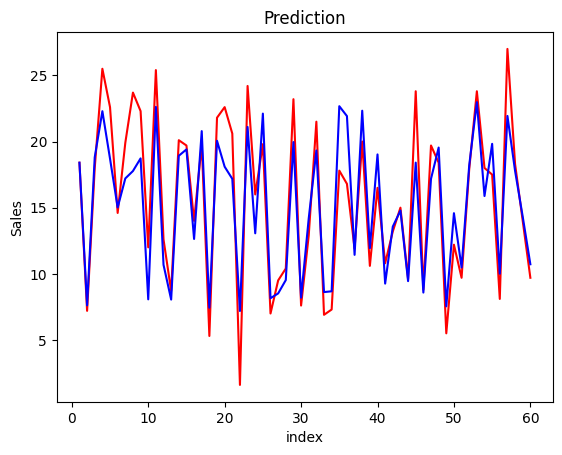

In [28]:
y_pred1 = lr_model1.predict(X_test1)
c = [i for i in range(1,61,1)]
plt.plot(c, y_test1, color="r")
plt.plot(c, y_pred1, color="b")
plt.xlabel("index")
plt.ylabel("Sales")
plt.title("Prediction")
plt.show()

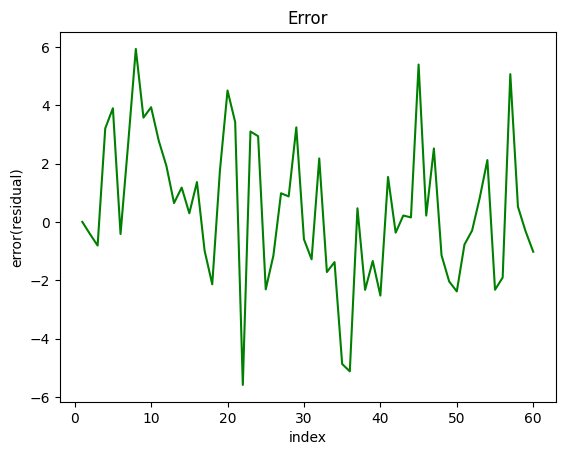

In [30]:
error = y_test1 - y_pred1
plt.plot(c, error, color="g")
plt.xlabel("index")
plt.ylabel("error(residual)")
plt.title("Error")
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(f"MSE:{mean_squared_error(y_pred1, y_test1):.2f}")
print(f"r2_score:{r2_score(y_pred1, y_test1):.2f}")

MSE:6.46
r2_score:0.75


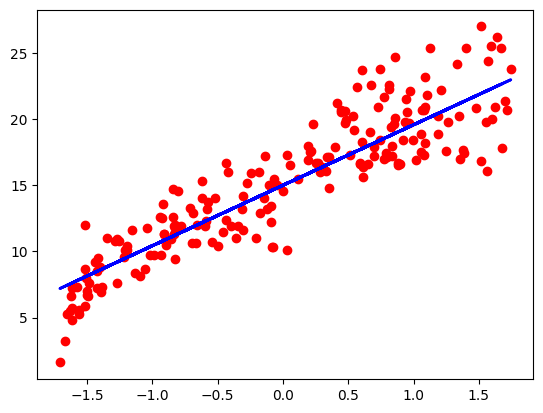

In [36]:
plt.scatter(X_scaled1, y_data1, color="red", label="scatter plot")
plt.plot(X_test1, y_pred1, color="blue", linewidth=2,label="Regression Line")
plt.show()

In [43]:
w1 = lr_model.coef_
print(f"slopes of TV: {w1[0][0]:.2f}")
b1 = lr_model.intercept_
print("Intercept is:", b1[0].round(2))

slopes of TV: 4.57
Intercept is: 15.0


In [44]:
X_data2 = advertising.drop(["Sales"], axis = 1)
y_data2 = advertising["Sales"]

In [47]:
X_scaled2 = scaler.fit_transform(X_data2)

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y_data2, test_size=0.3, random_state=10)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(140, 3) (60, 3) (140,) (60,)


In [49]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train2, y_train2)

LinearRegression()

In [50]:
mlr = pd.DataFrame({"Actual_value": y_test2,
                    "Model prediction":lr_model2.predict(X_test2)})
mlr.head()

,Actual_value,Model prediction
59,18.4,19.127479
5,7.2,10.658525
20,18.0,19.356496
198,25.5,24.315643
52,22.6,20.751037


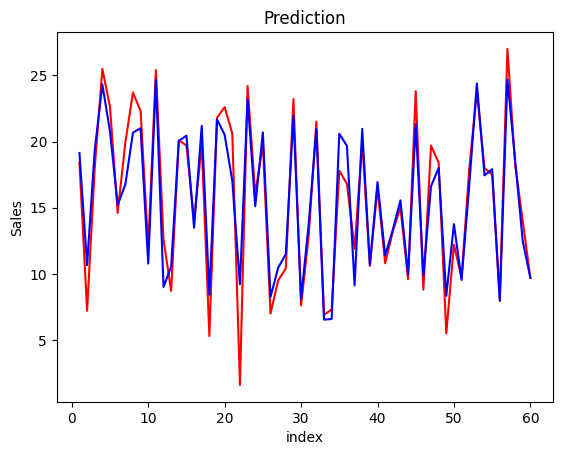

In [52]:
y_pred2 = lr_model2.predict(X_test2)
c = [i for i in range(1,61,1)]
plt.plot(c, y_test2, color="r")
plt.plot(c, y_pred2, color="b")
plt.xlabel("index")
plt.ylabel("Sales")
plt.title("Prediction")
plt.show()

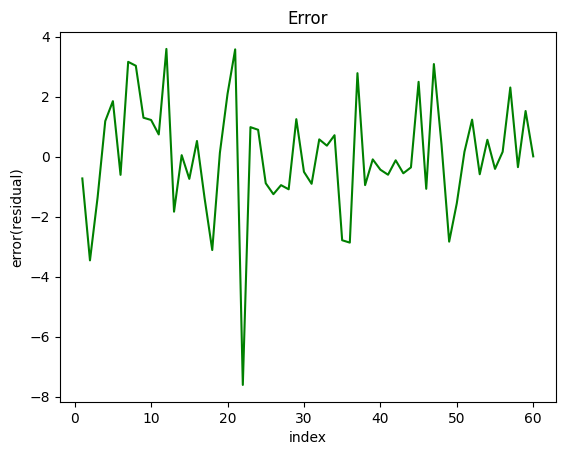

In [53]:
error2 = y_test2 - y_pred2
plt.plot(c, error2, color="g")
plt.xlabel("index")
plt.ylabel("error(residual)")
plt.title("Error")
plt.show()

In [54]:
print(f"MSE: {mean_squared_error(y_pred2, y_test2):.2f}")
print(f"r_score: {r2_score(y_pred2, y_test2):.2f}")

MSE: 3.66
r_score: 0.87


In [59]:
w2 = lr_model2.coef_
print(f"slope of TV: {w2[0]:.2f}")
print(f"slope of Radio: {w2[1]:.2f}")
print(f"slope of Newspaper: {w2[2]:.2f}")

b2 = lr_model2.intercept_
print("Intercept is:", b2.round(2))

slope of TV: 4.49
slope of Radio: 1.59
slope of Newspaper: 0.01
Intercept is: 15.13
